In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

Задание 1 Вариант 3

In [2]:
def f(x):
    return (math.exp(x) + 1/x)

In [3]:
x = np.arange(0.5, 1.5, 0.001)
print('Значения x:', x[0:10])
yf = np.vectorize(f)
y=yf(x)
print('Значения y:', y[0:10])

Значения x: [0.5   0.501 0.502 0.503 0.504 0.505 0.506 0.507 0.508 0.509]
Значения y: [3.64872127 3.6463788  3.64405389 3.64174643 3.63945635 3.63718354
 3.63492792 3.6326894  3.63046788 3.62826328]


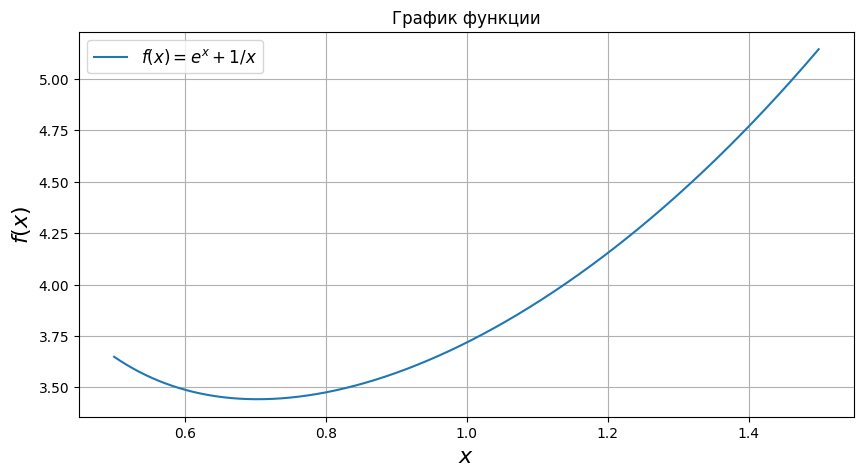

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(x, y,  label=r'$f(x)=e^x+1/x$')
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$f(x)$', fontsize = 16)
plt.grid(True)
plt.legend(loc='best', fontsize = 12)
plt.savefig('график.png')
plt.title(r'График функции')
plt.show()

Задание 2

In [5]:
from scipy import optimize

In [7]:
round(optimize.golden(f,brack=(-0.5, 1), tol=1e-6),6)

/var/folders/vp/w9z7k6vd5y93931bj990nlnc0000gn/T/ipykernel_71885/3085149156.py:2: RuntimeWarning: overflow encountered in scalar divide
  return (math.exp(x) + 1/x)


-0.0

Задание 3 Варинат 3

Метод подразрядного поиска

In [21]:
eps = 1e-6

In [22]:
def razryad_search(f,a,b,eps, i):
    n, m = 0, 0                   
    a = 0.5
    delta = eps
    x = a
    x_sled = a + delta
    while (f(x) > f(x_sled)):
        m += 2
        n += 1
        x = x_sled
        x_sled = x + delta
    x = round(x_sled,i)
    f = round(f(x),i)
    print('Итог:', '\nx =',x,'\nf(x) =',  f,'\nКол-во итераций:', n, '\nКол-во вычислений функций:', m)
        
razryad_search(f,0.5,1.5,eps, 6)

Итог: 
x = 0.703468 
f(x) = 3.442277 
Кол-во итераций: 203467 
Кол-во вычислений функций: 406934


Метод дихотомии

In [23]:
def dichotomy(f,a,b,eps, i):
    n, m = 0, 0
    sigma = 1e-6
    a = 0.5
    b = 1.5
    while (b - a)/2 >= eps:
        x1 = (b+a-sigma)/2
        x2 = (b+a+sigma)/2
        if (f(x1)<=f(x2)):
            b = x2    
        else:
            a = x1
        #print(a,b)
        m+=2
        n+=1
    x = round((a + b)/2, i)
    f = round(f(x), i)
    print('Итог:', '\nx =', x ,'\nf(x) =',  f,'\nКол-во итераций:', n, '\nКол-во вычислений функций:', m)

dichotomy(f, -0.5, 1, eps, 6)

Итог: 
x = 0.703467 
f(x) = 3.442277 
Кол-во итераций: 20 
Кол-во вычислений функций: 40


Метод парабол

In [24]:
def PARABOLA(f, a, b, eps, i):
    m = 0
    n = 1
    a = 0.5
    b = 1.5

    x1 = a
    x2 = b
    x3 = (a + b)/2
    f1 = f(x1)
    f2 = f(x2)
    f3 = f(x3)
    m = 3
    a0 = f1
    a1 = (f2 - f1)/(x2 - x1)
    a2 = (1/(x3 - x2))*(((f3 - f1)/(x3 - x1)) - ((f2 - f1)/(x2 - x1)))
    x_sred = 0.5 * (x1 + x2 - (a1/a2))
    delta = abs(x_sred - x3)
    f_x_sred = f(x_sred)
    m += 1
    if (x_sred > x1) & (x_sred < x2):
        if f2 >= f_x_sred:
            x3 = x2
            x2 = x_sred
            f3 = f2
            f2 = f_x_sred
        else:
            x1 = x_sred
            f1 = f_x_sred
    elif (x_sred > x2) | (x_sred < x1):
        if f2 >= f_x_sred:
            m+=2
            x1 = x2
            x2 = x_sred
            f1 = f2
            f2 = f_x_sred
        else:
            x3 = x_sred
            f3 = f3
    x_sled = x_sred
    X = [[x1, x2, x3],[f1, f2, f3]]
    #print(X)
    while (delta >= eps):
        x_last = x_sled
        n += 1
        x1 = X[0][0];
        x2 = X[0][1];
        x3 = X[0][2];
        f1 = X[1][0];
        f2 = X[1][1];
        f3 = X[1][2];
        
        a0 = f1
        a1 = (f2 - f1)/(x2 - x1)
        a2 = (1/(x3 - x2))*(((f3 - f1)/(x3 - x1)) - ((f2 - f1)/(x2 - x1)))
        
        x_sled = 0.5*(x1 + x2 - (a1/a2))
        f_sled = f(x_sled)
        m += 1
        if (x_sled > x1) & (x_sled < x2):
            if f2 >= f_sled:
                x3 = x2
                x2 = x_sled
                f3 = f2
                f2 = f_sled
            else:
                x1 = x_sled
                f1 = f_sled
        elif (x_sled > x2) & (x_sled < x3):
            if f2 >= f_sled:
                x1 = x2
                x2 = x_sled
                f1 = f2
                f2 = f_sled
            else:
                x3 = x_sled
                f3 = f_sled
        X =[]
        X = [[x1, x2, x3],[f1, f2, f3]]
        #print(X)
        delta = abs(x_sled - x_last)
    x = round(x_sled,i) 
    f = round(f_sled, i)
    print('Итог:', '\nx =', x,'\nf(x) =',  f,'\nКол-во итераций:', n, '\nКол-во вычислений функций:', m)
    
PARABOLA(f, 0.5, 1.5, eps, 6)

Итог: 
x = 0.703468 
f(x) = 3.442277 
Кол-во итераций: 14 
Кол-во вычислений функций: 17


Метод ньютона

In [26]:
import sumpy as sp

ModuleNotFoundError: No module named 'sumpy'

In [25]:
x = sp.Symbol('x')
function = math.exp(x) + 1/x
dx = sp.diff(function, x)
print('Первая производная:')
dx

NameError: name 'sp' is not defined